### 2.1 Import Libraries

In [3]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree.export import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import graphviz 
#from StringIO import StringIO


# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

### 2.3 Загрузка данных

In [4]:
train = pd.read_csv("../data/train.csv")
ts_X    = pd.read_csv("../data/test.csv")
ts_Y    = pd.read_csv("../data/gender_submission.csv")

print ('Datasets:' , 'train:' , train.shape, 
                     'ts_X:' , ts_X.shape, 
                     'ts_Y:' , ts_Y.shape)

#full = train.append( test , ignore_index = True )
#titanic = full[ :891 ]

#del train , test

#print ('Datasets:' , 'full:' , full.shape)

Datasets: train: (891, 12) ts_X: (418, 11) ts_Y: (418, 2)


### 2.4 Описание, статистика и визуализации

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Описание переменных**

  - Survived: выжил (1) или умер (0)
  - Pclass: класс пассажира
  - Name: Имя пассажира
  - Sex: пол пассажира
  - Age: возраст пассажира
  - SibSp: Количество братьев и сестер / супругов на борту
  - Parch: Количество родителей / детей на борту
  - Ticket: номер билета
  - Fare: Тариф
  - Cabin: Каюта
  - Embarked: порт посадки

[Больше информации на сайте Kaggle](https://www.kaggle.com/c/titanic/data)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.4 Предобработка данных для модели

In [8]:
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where( train.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
#print(sex.head())

# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( train.Embarked , prefix='Embarked' )
#print(embarked.head())

# Create a new variable for every unique value of Pclass
pclass = pd.get_dummies( train.Pclass , prefix='Pclass' )
#print(pclass.head())

# Create dataset
imputed = pd.DataFrame()

mean_age = train.Age.mean() 
#print ('mean_age = {}'.format(mean_age))
mean_face = train.Fare.mean()
#print ('mean_face = {}'.format(mean_face))

# Fill missing values of Age with the average of Age (mean)
imputed[ 'Age' ] = train.Age.fillna(mean_age)

# Fill missing values of Fare with the average of Fare (mean)
imputed[ 'Fare' ] = train.Fare.fillna(mean_face)
#print(imputed.head())

full_X = pd.concat( [ imputed , embarked ,  sex ] , axis=1 )
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex
0,22.0,7.2500,0,0,1,1
1,38.0,71.2833,1,0,0,0
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,0,0,1,0
4,35.0,8.0500,0,0,1,1


### 2.5 Сделаем процедуру для предобработки данных для модели обучения

In [9]:
def prepare_data_1(df,v_mean_age,v_mean_face):
    mean_age = v_mean_age
    mean_face = v_mean_face

    sex = pd.Series( np.where( df.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
    embarked = pd.get_dummies( df.Embarked , prefix='Embarked' )
    pclass = pd.get_dummies( df.Pclass , prefix='Pclass' )
    fare = df.Fare.fillna(mean_face)
    age = df.Age.fillna(mean_age)


    return pd.concat( [embarked ,  sex, fare, age ] , axis=1 )

### 2.6 Процедура отрисовки границ принятия решения 

In [10]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [11]:
def border_draw(clf, X, y, cmap=None, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X,y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'sprig')
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, cmap=cmap or 'sprig')
    if fit_clf:
        return clf

# 3. Моделирование

### 3.1 Делим данные для обучения на тренировочные и проверочные

In [12]:
# Create all datasets that are necessary to train, validate and test models
train_X , valid_X , train_y , valid_y = train_test_split( full_X , train.Survived , train_size = .7 )
print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape)

test_X =  prepare_data_1(ts_X,mean_age,mean_face)
test_Y = ts_Y.Survived
print (test_X.shape,test_Y.shape)

(891, 6) (623, 6) (268, 6) (623,) (268,)
(418, 6) (418,)


### 3.2 Обучаем модель с разными параметрами глубины дерева и оцениваем на проверочных данных

In [13]:
model_1 = DecisionTreeClassifier(max_depth=1)
model_1.fit( train_X , train_y )
print ('Score train = {}'.format(model_1.score( train_X , train_y )))
print ('Score valid = {}'.format(model_1.score( valid_X , valid_y )))
print ('Score test = {}'.format(model_1.score( test_X , test_Y )))


Score train = 0.7881219903691814
Score valid = 0.7835820895522388
Score test = 0.6363636363636364


In [14]:
model_1 = DecisionTreeClassifier(max_depth=2)
model_1.fit( train_X , train_y )
print ('Score train = {}'.format(model_1.score( train_X , train_y )))
print ('Score valid = {}'.format(model_1.score( valid_X , valid_y )))
print ('Score test = {}'.format(model_1.score( test_X , test_Y )))


Score train = 0.8041733547351525
Score valid = 0.7686567164179104
Score test = 0.36363636363636365


In [15]:
model_1 = DecisionTreeClassifier(max_depth=5)
model_1.fit( train_X , train_y )
print ('Score train = {}'.format(model_1.score( train_X , train_y )))
print ('Score valid = {}'.format(model_1.score( valid_X , valid_y )))
print ('Score test = {}'.format(model_1.score( test_X , test_Y )))


Score train = 0.8426966292134831
Score valid = 0.7985074626865671
Score test = 0.36363636363636365


In [16]:
model_1 = DecisionTreeClassifier(max_depth=10)
model_1.fit( train_X , train_y )
print ('Score train = {}'.format(model_1.score( train_X , train_y )))
print ('Score valid = {}'.format(model_1.score( valid_X , valid_y )))
print ('Score test = {}'.format(model_1.score( test_X , test_Y )))


Score train = 0.9406099518459069
Score valid = 0.75
Score test = 0.36363636363636365


In [17]:
model_1 = DecisionTreeClassifier(max_depth=20)
model_1.fit( train_X , train_y )
print ('Score train = {}'.format(model_1.score( train_X , train_y )))
print ('Score valid = {}'.format(model_1.score( valid_X , valid_y )))
print ('Score test = {}'.format(model_1.score( test_X , test_Y )))


Score train = 0.9823434991974318
Score valid = 0.7164179104477612
Score test = 0.36363636363636365


In [18]:
model_1 = DecisionTreeClassifier(max_depth=50)
model_1.fit( train_X , train_y )
print ('Score train = {}'.format(model_1.score( train_X , train_y )))
print ('Score valid = {}'.format(model_1.score( valid_X , valid_y )))
print ('Score test = {}'.format(model_1.score( test_X , test_Y )))


Score train = 0.9823434991974318
Score valid = 0.7238805970149254
Score test = 0.36363636363636365


#### По результатам изменения глубины действия, видно, что при высоких уровнях глубины дерева модель сильно переобучается - это видно по низкому коэффициенту на тестовых данных и практически идеальному на обученых.

#### Дерево глубиною 1 и 2 имеет лучшие результаты на отложенной выборке.

### 3.3 Определяем какие фичи приносят больший вклад в модель

In [19]:
model_1 = DecisionTreeClassifier(max_depth=3)
model_1.fit( train_X , train_y )
print ('Score train = {}'.format(model_1.score( train_X , train_y )))
print ('Score valid = {}'.format(model_1.score( valid_X , valid_y )))
print ('Score test = {}'.format(model_1.score( test_X , test_Y )))

feat_importance = model_1.tree_.compute_feature_importances()
print("feat importance = " + str(feat_importance))

Score train = 0.8073836276083467
Score valid = 0.7835820895522388
Score test = 0.36363636363636365
feat importance = [0.129354   0.18019258 0.         0.         0.         0.69045342]


#### Первые два параметра и последний параметр приносят 95% информации 

### 3.4 Визуализируем дерево принятия решения

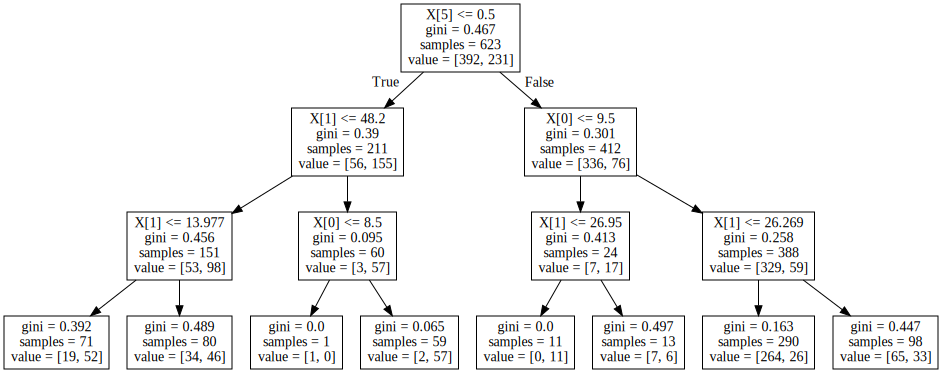

In [20]:
#import graphviz 
dot_data = export_graphviz(model_1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

### 4 Рисуем кривую ROC-AUC

#### 4.1 Определяем доли принадлежности к классам

In [21]:
model_1 = DecisionTreeClassifier(max_depth=3)
model_1.fit( train_X , train_y )
prob_test_Y = model_1.predict_proba(test_X)

#### 4.1 Самописный метод 

In [22]:
def calculate_tpr_and_fpr(y_true,y_pred_probas,alpha):
    pred_Y = np.where( y_pred_probas >= alpha , 1 , 0 )
    rs = np.vstack((y_true,pred_Y))
    rs1 = np.where(rs[0] == rs[1],'T','F' )
    rs2 = np.where(rs[1] == 1,'P','N' )
    rss = np.vstack((rs ,rs1, rs2 ))
    rs_TP = np.count_nonzero((rss[2] == 'T') & (rss[3] == 'P'))
    rs_TN = np.count_nonzero((rss[2] == 'T') & (rss[3] == 'N'))
    rs_FP = np.count_nonzero((rss[2] == 'F') & (rss[3] == 'P'))
    rs_FN = np.count_nonzero((rss[2] == 'F') & (rss[3] == 'N'))

    tpr = rs_TP/(rs_TP+rs_FN)
    fpr = rs_FP/(rs_FP+rs_TN)
    return tpr,fpr

In [23]:
def roc_auc_plot(y_true,y_pred_probas):
    alphas = np.arange(0,1,0.001)
    tprs, fprs  = [],[]
    for a in alphas:
        tpr, fpr = calculate_tpr_and_fpr(y_true,y_pred_probas,a)
        tprs.append(tpr)
        fprs.append(fpr)

    plt.plot(fprs, tprs)
    plt.show()

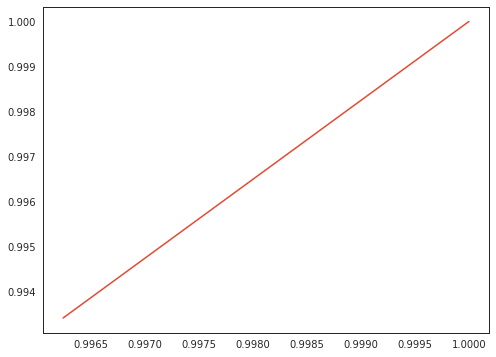

In [24]:
roc_auc_plot(test_Y, prob_test_Y[:,1])

#### 4.1 Штатный метод 

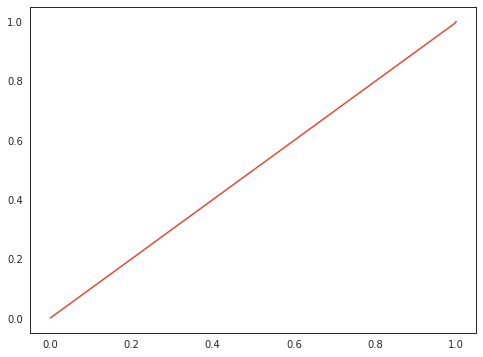

In [26]:
fpt, tpr, _ = metrics.roc_curve(test_Y, prob_test_Y[:,1])
plt.plot(fpt, tpr)
plt.show()



### 5 Обучаем KNeighborsClassifier и LogisticRegression

In [28]:
from sklearn.neighbors import KNeighborsClassifier

roc_auc_score = 0.5136278195488722


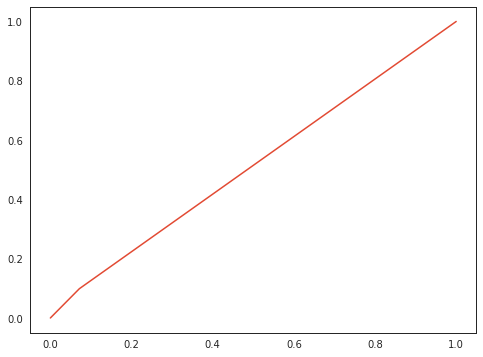

In [30]:
model_2 = KNeighborsClassifier(n_neighbors = 3 )
model_2.fit( train_X , train_y )
prob_test_Y = model_2.predict_proba(test_X)

print ('roc_auc_score = {}'.format(metrics.roc_auc_score(test_Y, prob_test_Y[:,1])))

fpt, tpr, _ = metrics.roc_curve(test_Y, prob_test_Y[:,1])
plt.plot(fpt, tpr)
plt.show()


In [32]:
from sklearn.linear_model import LogisticRegression

roc_auc_score = 0.48142560348239016


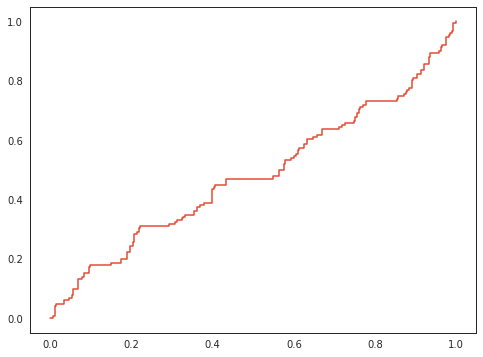

In [33]:
model_3 = LogisticRegression()
model_3.fit( train_X , train_y )
prob_test_Y = model_3.predict_proba(test_X)

print ('roc_auc_score = {}'.format(metrics.roc_auc_score(test_Y, prob_test_Y[:,1])))

fpt, tpr, _ = metrics.roc_curve(test_Y, prob_test_Y[:,1])
plt.plot(fpt, tpr)
plt.show()
